# Linear regression

Import all the modules you will need in this notebook here:

In [2]:
# exercise 0
# Put your solution here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [3]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
fram = pd.read_csv(get_path("fram.txt"), sep = "\t", header = 0)
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [4]:
# exercise 2

def rescale(S):
    sd = pd.Series.std(S)
    m = pd.Series.mean(S)

    diff = S.apply(lambda x: x - m)
    Sret = diff/(2*sd) 
    return Sret

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [5]:
# exercise 3
fram["sAGE"] = rescale(fram["AGE"])
fram["sFRW"] = rescale(fram["FRW"])
fram["sSBP"] = rescale(fram.iloc[:,3]) # SPB
fram["sDBP"] = rescale(fram["DBP"])
fram["sCHOL"] = rescale(fram["CHOL"])
fram["sCIG"] = rescale(fram["CIG"])
fram["sDEATH"] = rescale(fram["DEATH"])
fram["sYRS_DTH"] = rescale(fram["YRS_DTH"])

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [6]:
# exercise 4

# Normalized explanatory variables
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [7]:
# exercise 5

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.44e-46
Time:                        13:12:42   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

R-squred value, which refres to the models explanatory power, is 0.125 on the first fit and 0.146 on the model with age as explanatory variable. This means, inclusion of age increases the explanatory power 21 percentage points.

Since, the variables are scaled, the coefficient value can be used to resolve that weight explain the variance of the SPB the most. Also age explain it very significantly. Both of these variables has significance level (p-value) near zero.

***

Try to add to the model all the interactions with other variables. 

In [8]:
# exercise 6

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

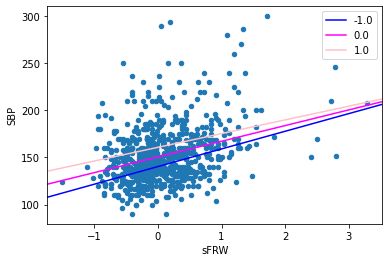

In [9]:
# exercise 7

p = fit.params
fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept = p.Intercept - p["sAGE"], slope = p.sFRW - p["sFRW:sAGE"], ax = plt.gca(), color="blue", label=-1.0)
abline_plot(intercept = p.Intercept, slope=p.sFRW, ax = plt.gca(), color="magenta", label=0.0)
abline_plot(intercept = p.Intercept + p["sAGE"], slope = p.sFRW + p["sFRW:sAGE"], ax = plt.gca(), color="pink", label=1.0)
plt.legend()

How does the dependence of blood pressure on weight change as a person gets older?
***

The dependece of blood pressure on weight decreases, when person gets older. In above graph, the differences between age groups age more significant among normal weighted people than over weighted. According to this model, young aged over weighted people are not protected from high blood pressure.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.99e-40
Time:                        13:12:43   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

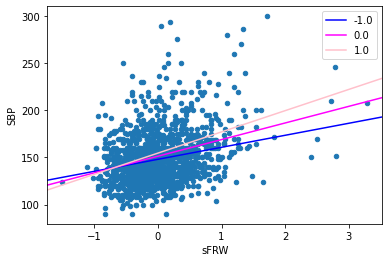

In [10]:
# exercise 8

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE', data=fram).fit()
print(fit.summary()) # Weight is the most important explanatory variable

p = fit.params
fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept = p.Intercept - p["sCHOL"], slope = p.sFRW - p["sFRW:sCHOL"], ax = plt.gca(), color="blue", label=-1.0)
abline_plot(intercept = p.Intercept, slope=p.sFRW, ax = plt.gca(), color="magenta", label=0.0)
abline_plot(intercept = p.Intercept + p["sCHOL"], slope = p.sFRW + p["sFRW:sCHOL"], ax = plt.gca(), color="pink", label=1.0)
plt.legend()

How does the model and its accuracy look?

***

The results of how the explanatory variables explain the SBP seem reasonable. According to the probability of F-statistics value, which is near zero, the model is accurate. Although, the R2-value is quite low (~ 0.15), which suggests some deficiencies in the model. 

***

# Logistic regression

In [11]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [12]:
# exercise 9
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data = fram, family=sm.families.Binomial()).fit()
fit.summary()

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~ fram.HIGH_BP))
print(error_rate_orig)

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [13]:
# exercise 10

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data = fram, family=sm.families.Binomial()).fit()
fit.summary()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~ fram.HIGH_BP))
print(error_rate)

0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

In [14]:
print(min(fram.sCHOL))

-1.4971216199430841


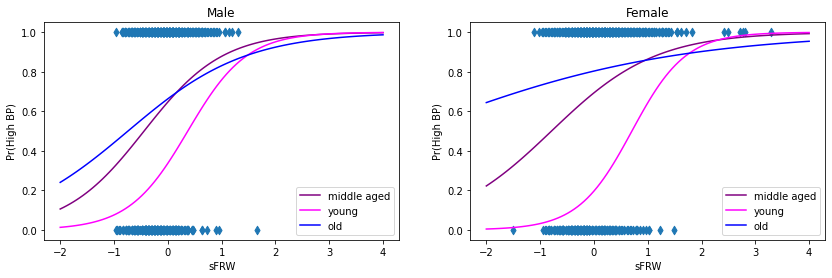

In [15]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Subset of males and females:
males = fram[fram['SEX']=='male']
females = fram[fram['SEX']=='female']

# fitted models of both subsets
fit_m = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data = males, family=sm.families.Binomial()).fit()
fit_f = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data = females, family=sm.families.Binomial()).fit()

fig, ax = plt.subplots(1,2, subplot_kw={ "xlabel": "sFRW", "ylabel": "Pr(High BP)"}, figsize=(14, 4))

ax[0].scatter(males.sFRW, males.HIGH_BP, marker = "d")
ax[0].set_title("Male")

X=np.linspace(-2, 4, 100)
p = fit_m.params

ax[0].plot(X, logistic(X*p.sFRW + p.Intercept), color = "purple", label="middle aged")
ax[0].plot(X, logistic(X*(p.sFRW - p["sAGE:sFRW"]) - p["sAGE"] - p.Intercept), color="magenta", label="young")
ax[0].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"]) + p["sAGE"] + p.Intercept), color="blue", label="old")
ax[0].legend()

p2 = fit_f.params
ax[1].scatter(females.sFRW, females.HIGH_BP, marker = "d")
ax[1].set_title("Female")

ax[1].plot(X, logistic(X*p2.sFRW + p2.Intercept), color = "purple", label="middle aged")
ax[1].plot(X, logistic(X*(p2.sFRW - p2["sAGE:sFRW"]) - p2["sAGE"] - p2.Intercept), color="magenta", label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p2["sAGE:sFRW"]) + p2["sAGE"] + p2.Intercept), color="blue", label="old")
ax[1].legend()


How do the models with different ages and genders differ from each other?

***
The differences between age groups are more significant in females than males. The old females has very high probability to have high BP regardless of their weight. 
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [16]:
# exercise 12

def train_test_split(df, train_fraction):
    shuffled = df.sample(frac=1)
    train_size = int(train_fraction * len(df))
    train_set = shuffled[:train_size]
    test_set = shuffled[train_size:]

    return train_set, test_set


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [17]:
# exercise 13
np.random.seed(1)

error_model=[]
error_null=[]

for i in range(100):
    train, test = train_test_split(fram, 0.8)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data = train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

pd.Series(error_model).mean(), pd.Series(error_null).mean()

(0.3311827956989248, 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [18]:
# exercise 14

fram["hasCHD"] = (fram.CHD > 0)
fram["hasCHD"] = fram["hasCHD"].astype(int)
print(fram.hasCHD.mean()) # 22 %

0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [19]:
# exercise 15

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data = fram, family=sm.families.Binomial()).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~ fram.hasCHD))

print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Mon, 14 Mar 2022   Deviance:                       1442.4
Time:                        13:12:49   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

Text(0, 0.5, 'Pr(CHD)')

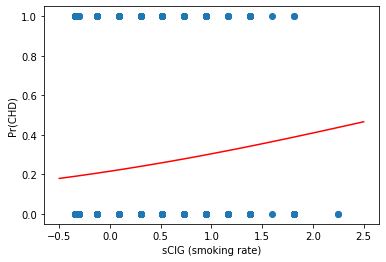

In [20]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

plt.scatter(fram.sCIG, fram.hasCHD)
X=np.linspace(-0.5, 2.5, 100)

p = fit.params
plt.plot(X, logistic(X*p.sCIG + p.Intercept), color="red")
plt.xlabel("sCIG (smoking rate)")
plt.ylabel("Pr(CHD)")

# Smoking seems to increase the risk of CHD linearly not logistically.


Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***

The predicton accuracy seems quite bad, since the curve is not logistic. This suggests no practical use of the model.

***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [49]:
# exercise 17

point = dict(zip(fram.CHOL, fram.sCHOL))
point2 = dict(zip(fram.FRW, fram.sFRW))
point3 = dict(zip(fram.CIG, fram.sCIG))

schol = point[200]
sfrw = point2[100]
#ssig = point3[17] Does not works since data has no example of person who smokes 17 sigarettes a day

# Let's check if the data is normalized linearly
zero = fram.sCIG[fram.CIG==0].astype(float)
one = fram.sCIG[fram.CIG==1].astype(float)
maxcig = fram["CIG"].max()
diff = abs(zero[0]-one[23]) # using these indexes to reach the values not lists
res = diff*maxcig+zero

print(fram.sCIG[fram.CIG==fram.CIG.max()].astype(float)[1060])
print(res[0])

# Data is normalized linearly based on these calculations
# --> sCIG can be calculated based on the diff variable
ssig = diff*17+zero
ssig = ssig[0]

# fitted model
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data = fram, family=sm.families.Binomial()).fit()

'''
person = {'sCHOL': schol, 'sCIG': ssig, 'sFRW': sfrw}
person = pd.DataFrame(person)
'''
person = pd.DataFrame(columns = ['sCHOL','sCIG','sFRW'])
person.loc[0] = [schol, ssig, sfrw] 
predicted = fit.predict(person)

print(predicted)
# The probability is 0.216

2.243179003221786
2.243179003221786
0    0.216162
dtype: float64
